In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
df=pd.read_csv('Final Training Data.csv')

In [3]:
df

,Freq [GHz],"dB(S(1,1)) [] - x2='-1mm'","dB(S(1,1)) [] - x2='-0.99mm'","dB(S(1,1)) [] - x2='-0.98mm'","dB(S(1,1)) [] - x2='-0.97mm'","dB(S(1,1)) [] - x2='-0.96mm'","dB(S(1,1)) [] - x2='-0.95mm'","dB(S(1,1)) [] - x2='-0.94mm'","dB(S(1,1)) [] - x2='-0.93mm'","dB(S(1,1)) [] - x2='-0.92mm'",...,"dB(S(2,1)) [] - x2='1.42mm'","dB(S(2,1)) [] - x2='1.43mm'","dB(S(2,1)) [] - x2='1.44mm'","dB(S(2,1)) [] - x2='1.45mm'","dB(S(2,1)) [] - x2='1.46mm'","dB(S(2,1)) [] - x2='1.47mm'","dB(S(2,1)) [] - x2='1.48mm'","dB(S(2,1)) [] - x2='1.49mm'","dB(S(2,1)) [] - x2='1.5mm'",Remarks
0,1.5,-12.893659,-1.832458,-9.513399,-3.116279,-6.358051,-7.777262,-7.047951,-7.782184,-0.608266,...,-10.962695,-12.900487,-9.859745,-5.882533,-23.470487,-12.006248,-14.730990,-7.019660,-1.873324,1
1,1.6,-12.991152,-0.663576,-19.468039,-3.897184,-6.498559,-5.903157,-7.097819,-7.558585,1.000056,...,-10.913970,-13.371237,-10.425278,-6.881570,-22.203832,-11.342097,-14.749278,-6.227251,-9.407123,1
2,1.7,-12.627323,-1.369137,-25.401938,-4.980853,-6.704077,-5.074367,-6.624297,-7.473373,1.682271,...,-11.186209,-13.304800,-10.872088,-16.174220,-21.227858,-14.402674,-14.846135,-4.951703,-9.156308,1
3,1.8,-12.250263,-7.485185,-18.400993,-6.339248,-6.998973,-4.699715,-5.855351,-7.520035,0.406551,...,-11.742017,-13.349713,-12.809438,-22.039679,-20.583134,-15.635723,-15.011713,3.909169,-9.716872,1
4,1.9,-12.077446,-11.099106,-15.611730,-7.877159,-7.383113,-4.426425,-5.012705,-7.679981,-2.750883,...,-12.462274,-13.532417,-16.286438,-24.258430,-20.209666,-16.000900,-15.236984,-20.545895,-10.446618,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,14.6,-17.538081,-17.619946,-17.641009,-18.963586,-17.110867,-19.191412,-16.395256,-19.389751,-16.674690,...,-15.770079,-15.812945,-15.302375,-15.733701,-15.619594,-15.655104,-15.855382,-15.517937,-14.263150,0
268,14.7,-16.945454,-17.293918,-17.218518,-18.421524,-16.545545,-18.455818,-16.576565,-18.717360,-16.561510,...,-15.796585,-15.820102,-15.250115,-15.694116,-15.622190,-15.658530,-15.803913,-15.429781,-14.283677,0
269,14.8,-16.459029,-17.235556,-17.056352,-17.966336,-16.327548,-17.878623,-16.774181,-18.113174,-16.573206,...,-15.832325,-15.859758,-15.260819,-15.669257,-15.697635,-15.708181,-15.539821,-15.358612,-14.316306,0
270,14.9,-16.118303,-17.356606,-17.364049,-17.765173,-16.631424,-17.511532,-16.987191,-18.521136,-16.606482,...,-15.872977,-15.934989,-15.382894,-15.655583,-15.705945,-15.820361,-16.168532,-15.302839,-14.354671,0


In [4]:
## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score

In [5]:
X=df.drop('Remarks',axis=1)
y=df["Remarks"]

In [6]:
# Random seed for reproducibility
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.4) # percentage of data to use for test set

In [7]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [8]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

/home/subhadip/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/subhadip/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

{'KNN': 1.0, 'Logistic Regression': 1.0, 'Random Forest': 1.0}

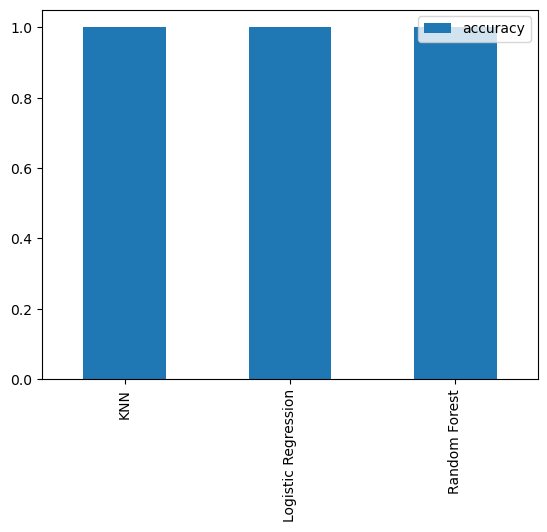

In [28]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

In [9]:
gd=pd.read_csv('GOOD_S_Parameters for Testing_1.csv')
gd

,Freq [GHz],"dB(S(1,1)) [] - x2='-1mm'","dB(S(1,1)) [] - x2='-0.99mm'","dB(S(1,1)) [] - x2='-0.98mm'","dB(S(1,1)) [] - x2='-0.97mm'","dB(S(1,1)) [] - x2='-0.96mm'","dB(S(1,1)) [] - x2='-0.95mm'","dB(S(1,1)) [] - x2='-0.94mm'","dB(S(1,1)) [] - x2='-0.93mm'","dB(S(1,1)) [] - x2='-0.92mm'",...,"dB(S(2,1)) [] - x2='1.41mm'","dB(S(2,1)) [] - x2='1.42mm'","dB(S(2,1)) [] - x2='1.43mm'","dB(S(2,1)) [] - x2='1.44mm'","dB(S(2,1)) [] - x2='1.45mm'","dB(S(2,1)) [] - x2='1.46mm'","dB(S(2,1)) [] - x2='1.47mm'","dB(S(2,1)) [] - x2='1.48mm'","dB(S(2,1)) [] - x2='1.49mm'","dB(S(2,1)) [] - x2='1.5mm'"
0,1.5,-12.893660,-1.832458,-9.513399,-3.116279,-6.358051,-7.777262,-7.047951,-7.782184,-0.608266,...,-12.769284,-10.962695,-12.900487,-9.859745,-5.882533,-23.470487,-12.006248,-14.730990,-7.019660,-1.873324
1,1.6,-12.991152,-0.663576,-19.468039,-3.897184,-6.498559,-5.903157,-7.097819,-7.558585,1.000056,...,-11.689298,-10.913970,-13.371237,-10.425278,-6.881570,-22.203832,-11.342097,-14.749278,-6.227251,-9.407123
2,1.7,-12.627323,-1.369137,-25.401938,-4.980853,-6.704077,-5.074367,-6.624297,-7.473373,1.682271,...,-11.110241,-11.186209,-13.304800,-10.872088,-16.174220,-21.227858,-14.402674,-14.846135,-4.951703,-9.156308
3,1.8,-12.370263,-7.485185,-18.400993,-6.339248,-6.998973,-4.699715,-5.855351,-7.520035,0.406551,...,-11.279216,-11.742017,-13.349713,-12.809438,-22.039679,-20.583134,-15.635723,-15.011713,3.909169,-9.716872
4,1.9,-12.077446,-11.099106,-15.611730,-7.877159,-7.383113,-4.426425,-5.012705,-7.679981,-2.750883,...,-12.120062,-12.462274,-13.532417,-16.286438,-24.258430,-20.209666,-16.000900,-15.236984,-20.545895,-10.446618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,14.6,-14.584283,-14.409112,-14.550314,-15.221029,-15.552620,-14.556010,-14.261700,-13.591298,-14.653982,...,-23.022743,-23.373493,-21.182244,-22.283447,-21.022864,-22.179451,-21.267685,-21.362667,-22.271852,-18.319133
132,14.7,-14.838617,-14.714206,-14.796638,-15.658541,-15.941311,-14.921466,-14.650349,-14.043325,-14.122957,...,-22.995312,-23.654527,-21.335137,-22.383698,-21.133770,-22.347735,-21.485697,-21.640896,-22.468853,-18.502956
133,14.8,-15.093508,-15.077026,-15.068515,-16.101623,-16.352495,-15.299957,-15.110307,-14.438391,-15.490024,...,-23.128099,-23.993090,-21.550000,-22.656069,-21.316980,-22.559452,-21.782252,-21.984408,-22.684642,-18.734824
134,14.9,-15.545560,-15.526157,-15.486530,-16.527806,-16.785815,-15.691574,-15.661909,-14.805222,-16.148008,...,-23.389899,-24.416707,-21.816302,-23.092638,-21.573306,-22.809271,-22.144770,-22.395297,-22.909720,-19.002578


In [32]:
model=RandomForestClassifier()
model.fit(X_train,y_train)
print(f'The model score is {model.score(X_test,y_test)*100}%')

The model score is 100.0%


In [11]:
model.predict(gd)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [14]:
bd=pd.read_csv('BAD_S_Parameters for  Testing_1.csv')
bd

,Freq [GHz],"dB(S(1,1)) [] - x2='-1mm'","dB(S(1,1)) [] - x2='-0.99mm'","dB(S(1,1)) [] - x2='-0.98mm'","dB(S(1,1)) [] - x2='-0.97mm'","dB(S(1,1)) [] - x2='-0.96mm'","dB(S(1,1)) [] - x2='-0.95mm'","dB(S(1,1)) [] - x2='-0.94mm'","dB(S(1,1)) [] - x2='-0.93mm'","dB(S(1,1)) [] - x2='-0.92mm'",...,"dB(S(1,2)) [] - x2='1.41mm'","dB(S(1,2)) [] - x2='1.42mm'","dB(S(1,2)) [] - x2='1.43mm'","dB(S(1,2)) [] - x2='1.44mm'","dB(S(1,2)) [] - x2='1.45mm'","dB(S(1,2)) [] - x2='1.46mm'","dB(S(1,2)) [] - x2='1.47mm'","dB(S(1,2)) [] - x2='1.48mm'","dB(S(1,2)) [] - x2='1.49mm'","dB(S(1,2)) [] - x2='1.5mm'"
0,1.5,-7.751523,-12.219513,-6.137465,-6.106442,-0.165106,-0.165118,-0.165105,-0.165118,-0.016696,...,-3.569885,-7.096394,-7.842470,-9.058340,-3.971997,-5.940642,-5.382164,-6.877952,-4.440938,-6.923127
1,1.6,-9.226944,-7.470771,-8.210161,-8.097390,0.571923,0.571923,0.571923,0.571923,0.601815,...,-3.121633,0.377047,-6.378831,-9.775229,-3.600396,-4.520116,-8.324224,-5.581385,-22.204543,-7.938367
2,1.7,-10.119460,-3.971288,-10.558619,-4.674817,-5.118929,-5.118895,-5.118923,-5.118897,-2.497159,...,-2.325681,-7.709009,-7.831154,-8.531354,-4.265512,-6.251606,-9.595782,-3.306791,-25.362954,-9.129199
3,1.8,-11.839994,3.578798,-13.076190,0.793329,-6.763945,-6.764026,-6.763941,-6.764022,-6.400769,...,-2.225466,-8.652376,-8.327647,-8.531041,-4.603014,-8.713882,-9.869341,-12.816083,-36.579619,-10.324222
4,1.9,-13.657294,-5.748057,-15.771597,11.130838,-10.880535,-10.880380,-10.880555,-10.880382,-11.302617,...,-1.488401,-9.680450,-8.857571,-8.532697,-5.058343,-8.640416,-9.981417,-15.095812,-27.566965,-11.494222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,14.6,-17.538081,-17.619946,-17.641009,-18.963586,-16.106406,-16.106406,-16.106406,-16.106406,-14.674564,...,-15.393052,-15.770079,-15.812945,-15.302375,-15.733701,-15.619594,-15.655104,-15.855382,-15.517937,-14.263150
132,14.7,-16.945454,-17.293918,-17.218518,-18.421524,-14.313238,-14.313238,-14.313238,-14.313238,-13.235761,...,-15.323284,-15.796585,-15.820102,-15.250115,-15.694116,-15.622190,-15.658530,-15.803913,-15.429781,-14.283677
133,14.8,-16.459029,-17.235556,-17.056352,-17.966336,-13.186387,-13.186387,-13.186387,-13.186387,-12.294040,...,-15.137862,-15.832325,-15.859758,-15.260819,-15.669257,-15.697635,-15.708181,-15.539821,-15.358612,-14.316306
134,14.9,-16.118303,-17.356606,-17.364049,-17.765173,-12.467760,-12.467760,-12.467760,-12.467760,-11.658378,...,-15.661062,-15.872977,-15.934989,-15.382894,-15.655583,-15.705945,-15.820361,-16.168532,-15.302839,-14.354671


In [15]:
model.predict(bd)

/home/subhadip/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- dB(S(1,2)) [] - x2='-0.01mm'
- dB(S(1,2)) [] - x2='-0.02mm'
- dB(S(1,2)) [] - x2='-0.03mm'
- dB(S(1,2)) [] - x2='-0.0499999999999999mm'
- dB(S(1,2)) [] - x2='-0.04mm'
- ...
Feature names seen at fit time, yet now missing:
- dB(S(2,1)) [] - x2='-0.01mm'
- dB(S(2,1)) [] - x2='-0.02mm'
- dB(S(2,1)) [] - x2='-0.03mm'
- dB(S(2,1)) [] - x2='-0.0499999999999999mm'
- dB(S(2,1)) [] - x2='-0.04mm'
- ...

  warnings.warn(message, FutureWarning)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [33]:
model2=KNeighborsClassifier()
model2.fit(X_train,y_train)
print(f'The model score is {model2.score(X_test,y_test)*100}%')

The model score is 100.0%


/home/subhadip/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [34]:
model3=LogisticRegression()
model3.fit(X_train,y_train)
print(f'The model score is {model3.score(X_test,y_test)*100}%')

The model score is 100.0%


/home/subhadip/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
model2.predict(gd)

/home/subhadip/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [25]:
model2.predict(bd)

/home/subhadip/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- dB(S(1,2)) [] - x2='-0.01mm'
- dB(S(1,2)) [] - x2='-0.02mm'
- dB(S(1,2)) [] - x2='-0.03mm'
- dB(S(1,2)) [] - x2='-0.0499999999999999mm'
- dB(S(1,2)) [] - x2='-0.04mm'
- ...
Feature names seen at fit time, yet now missing:
- dB(S(2,1)) [] - x2='-0.01mm'
- dB(S(2,1)) [] - x2='-0.02mm'
- dB(S(2,1)) [] - x2='-0.03mm'
- dB(S(2,1)) [] - x2='-0.0499999999999999mm'
- dB(S(2,1)) [] - x2='-0.04mm'
- ...

  warnings.warn(message, FutureWarning)
/home/subhadip/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` wil

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [26]:
model3.predict(gd)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [27]:
model3.predict(bd)

/home/subhadip/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- dB(S(1,2)) [] - x2='-0.01mm'
- dB(S(1,2)) [] - x2='-0.02mm'
- dB(S(1,2)) [] - x2='-0.03mm'
- dB(S(1,2)) [] - x2='-0.0499999999999999mm'
- dB(S(1,2)) [] - x2='-0.04mm'
- ...
Feature names seen at fit time, yet now missing:
- dB(S(2,1)) [] - x2='-0.01mm'
- dB(S(2,1)) [] - x2='-0.02mm'
- dB(S(2,1)) [] - x2='-0.03mm'
- dB(S(2,1)) [] - x2='-0.0499999999999999mm'
- dB(S(2,1)) [] - x2='-0.04mm'
- ...

  warnings.warn(message, FutureWarning)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])